In [65]:
%config Completer.use_jedi = False  # enable code auto-completion
import numpy as np    # library for numerical computations (vectors, matrices, tensors)
import pandas as pd    # library for data manipulation and analysis
import matplotlib.pyplot as plt    # library providing tools for plotting data
from sklearn.preprocessing import PolynomialFeatures    # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression, HuberRegressor    # classes providing Linear Regression with ordinary squared error loss and Huber loss, respectively
from sklearn.metrics import mean_squared_error    # function to calculate mean squared error 
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns


In [66]:
FMIRawData = pd.read_csv("data_set.csv")

In [67]:
FMIRawData.head(5) 

,ACS,Kills,Deaths,Assists,Difference,KAST,ADR,HS,FK,FD,Diff
0,365,47,20,9,27,84%,213,17%,12,5,7
1,66,1,14,4,-13,47%,64,13%,0,4,-4
2,69,10,46,15,-36,56%,44,23%,1,4,-3
3,69,22,36,9,-14,67%,50,29%,1,5,-4
4,70,4,15,1,-11,42%,46,9%,0,7,-7


In [68]:
FMIRawData.columns

Index(['ACS', 'Kills', 'Deaths', 'Assists', 'Difference', 'KAST', 'ADR', 'HS',
       'FK', 'FD', 'Diff'],
      dtype='object')

In [69]:
data = FMIRawData.drop(columns=['Difference','HS','Diff','KAST'])

In [70]:
data_column = (data['Kills']+data['Assists'])/data['Deaths']
data.insert(0,"KDA",data_column)
data.drop(['Kills','Assists','Deaths'],axis = 1,inplace=True)
data.head()

,KDA,ACS,ADR,FK,FD
0,2.800000,365,213,12,5
1,0.357143,66,64,0,4
2,0.543478,69,44,1,4
3,0.861111,69,50,1,5
4,0.333333,70,46,0,7


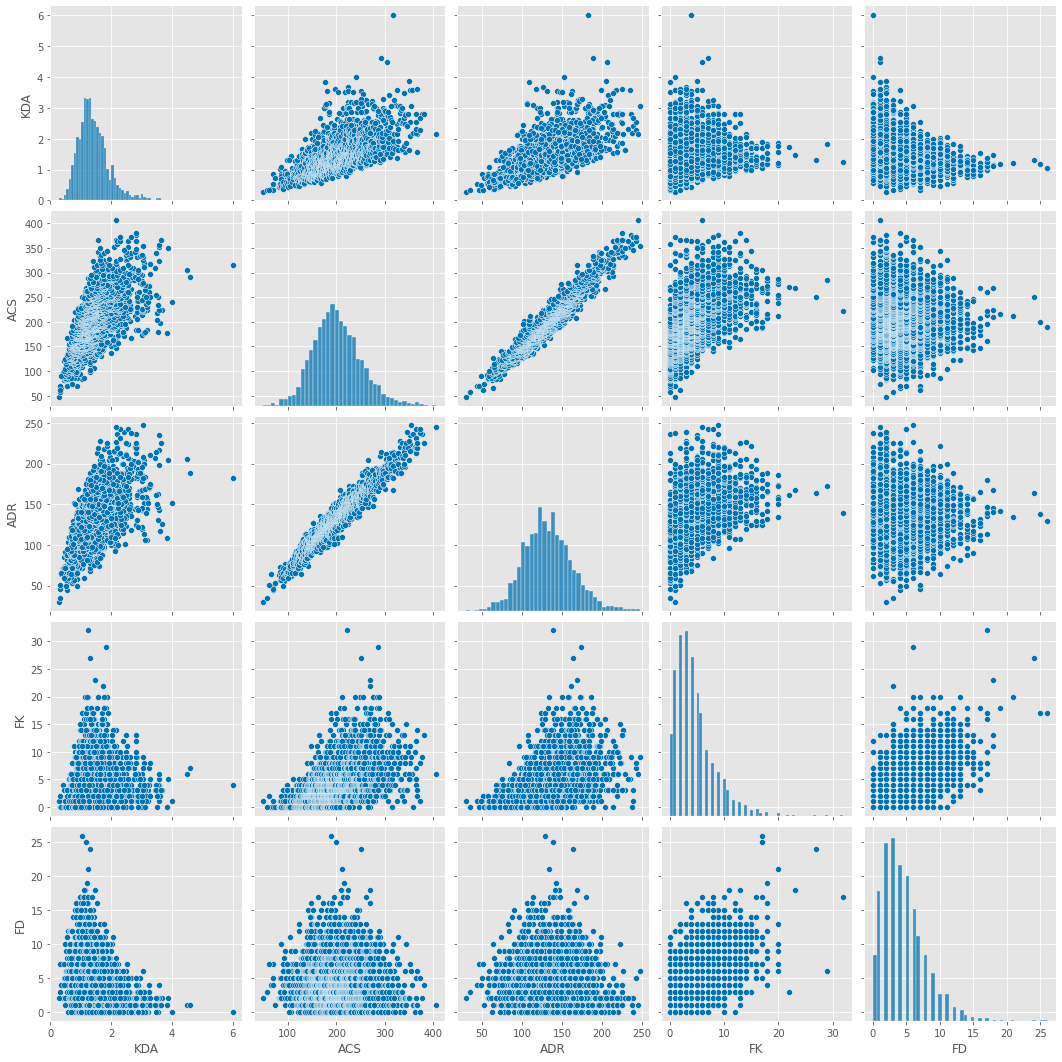

In [71]:
sns.set_palette('colorblind')
sns.pairplot(data, height=3)

In [72]:
X = data.drop('ACS',axis=1).to_numpy()
y = data['ACS'].to_numpy()

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_rem,y_train,y_rem = train_test_split(X,y,test_size=0.5,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_rem,y_rem,test_size=0.5,random_state=42)

In [74]:
lin_regr = LinearRegression(fit_intercept = False)
lin_regr.fit(X_train,y_train)
y_pred_train = lin_regr.predict(X_train)
tr_error = mean_squared_error(y_train,y_pred_train)
y_pred_val = lin_regr.predict(X_val)
val_error = mean_squared_error(y_val,y_pred_val)
y_pred_test = lin_regr.predict(X_test)
test_error = mean_squared_error(y_test,y_pred_test)
print(tr_error,val_error, test_error)

130.7191173475816 133.25751521423234 150.15184664500023


<AxesSubplot:ylabel='Density'>

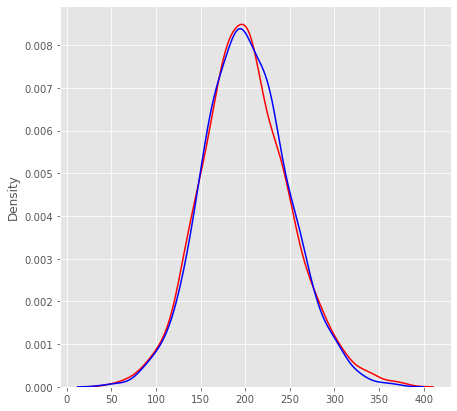

In [75]:
ax1 = sns.distplot(y_train, hist = False, color = 'r', label = "Actual Value")
sns.distplot(y_pred_train,hist=False,color='b',label = 'Fitted Value', ax=ax1)

<AxesSubplot:>

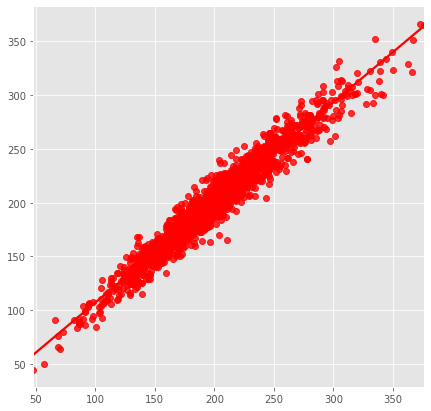

In [76]:
sns.regplot(x=y_train,y=y_pred_train,ci=None,color="r")

<AxesSubplot:>

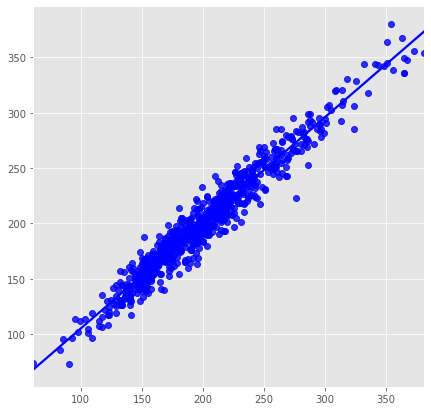

In [77]:
sns.regplot(x=y_val,y=y_pred_val,ci=None,color='b')

<AxesSubplot:>

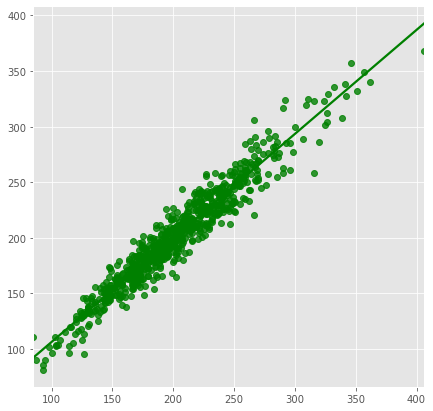

In [78]:
sns.regplot(x=y_test,y=y_pred_test,ci=None,color='g')